# 2D IR Spectroscopy

In [1]:
#!/usr/bin/env python
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
#dip_mat = np.loadtxt('2oszill_dipmat.txt')
#dip_mat = np.loadtxt('watertest/intenmat.txt')
#elevelmat = np.loadtxt('watertest/freqsmat.txt')

mol = ''

dip_mat = np.loadtxt('%sintenmat.txt' %(mol))
elevelmat = np.loadtxt('%sfreqsmat.txt' %(mol))

dip_math = np.loadtxt('%sintenmatharm.txt' %(mol))
elevelmath = np.loadtxt('%sfreqsmatharm.txt' %(mol))

e_level = elevelmat[0]
e_levelh = elevelmath[0]

n_loc_moden = len(dip_mat)-1
#N = len(dip_mat)

'''
dip_mat = [[0,1,1,0,0,0],
          [0,0,0,1.414,1.414,0],
          [0,0,0,0,1.414,1.414],
          [0,0,0,0,0,0],
          [0,0,0,0,0,0],
          [0,0,0,0,0,0]]
'''

print('Dipole matrix:\n', dip_mat)
print('Length dipole matrix: ', len(dip_mat))
print('Energy levels:\n', e_level)

print('Harm. Dipole matrix:\n', dip_math)
print('Harm. Length dipole matrix: ', len(dip_math))
print('Harm. Energy levels:\n', e_levelh)

Dipole matrix:
 [[ 0.00000000e+00  4.85767219e+01  5.97508204e-01  1.25738050e+00
   1.69644854e+01  8.45696678e-02  4.72177265e-02  3.70899285e-01
   3.21168201e+00  8.48618119e-02]
 [-4.85767219e+01  0.00000000e+00  1.01381768e+02  2.21087820e+00
   2.49200001e-02  5.14257893e-01  1.97922485e+01  8.05977920e-02
   1.18650995e-03  8.03235672e-04]
 [-5.97508204e-01 -1.01381768e+02  0.00000000e+00  5.17313998e-02
   2.88838968e-04  3.68220829e-01  8.09779842e-03  3.02757351e-02
   2.76803156e-01  3.39601624e-03]
 [-1.25738050e+00 -2.21087820e+00 -5.17313998e-02  0.00000000e+00
   6.01196402e-03  4.38722794e+01  8.10158120e-02  1.32775100e+00
   1.29466230e+01  1.20650029e-01]
 [-1.69644854e+01 -2.49200001e-02 -2.88838968e-04 -6.01196402e-03
   0.00000000e+00  9.31561163e-02  4.43831314e+01  1.78939450e+00
   7.52495797e-01  2.95397024e+01]
 [-8.45696678e-02 -5.14257893e-01 -3.68220829e-01 -4.38722794e+01
  -9.31561163e-02  0.00000000e+00  1.61916867e-02  9.05966813e-04
   8.74013329e-03

In [3]:
def calc_2dir(e_level,dip_mat,N):
    exc_x = [] # excitation coords
    exc_y = [] 
    exc_i = [] # intensity

    emi_x = [] # stimulated emission coords
    emi_y = [] 
    emi_i = [] # intensity

    ble_x = [] # bleaching coords
    ble_y = [] 
    ble_i = [] # intensity

    scale = 1

    for i in range(len(dip_mat)):
        if dip_mat[0][i] != 0:
            for j in range(len(dip_mat)):

                # Excitation: 
                if dip_mat[i][j] != 0 and j>i:
                    y_coor = e_level[j]-e_level[i]
                    x_coor = e_level[i]-e_level[0]
                    exc_y.append(y_coor)
                    exc_x.append(x_coor)
                    exc_inten = dip_mat[i][j]
                    exc_i.append(exc_inten*scale)
                    #print(dip_mat[i][j],inten**2)
                    #print('Excitation from energy level',i,'to',j,'at (',x_coor,',',y_coor,') rcm and intensity: ',exc_inten)

                # Stimulated emission:
                # in order to match the experiment the stimulated emission can only happen in transition to the ground energy level! 
                if j == 0:
                    if dip_mat[j][i] != 0 and i>j:
                        y_coor = e_level[i]-e_level[j]
                        x_coor = e_level[i]-e_level[j]
                        emi_y.append(y_coor)
                        emi_x.append(x_coor)
                        emi_inten = dip_mat[j][i]
                        emi_i.append(emi_inten*scale)
                        #print(dip_mat[j][i])
                        #print('Stimulated emission from energy level',i,'to',j,'at (',x_coor,',',y_coor,') rcm and intensity: ',emi_inten)

                # Bleaching:
                #if dip_mat[0][j] != 0:
                #    y_coor = e_level[j]-e_level[0]
                #    x_coor = e_level[i]-e_level[0]
                #    ble_y.append(y_coor)
                #    ble_x.append(x_coor)
                #    ble_inten = dip_mat[0][j]
                #    ble_i.append(ble_inten*scale)
                #    print(dip_mat[0][j])
                #    print('Bleaching from energy level 0 to',i,'at (',x_coor,',',y_coor,') rcm and intensity: ',ble_inten)
                    
                # Bleaching:
            if dip_mat[0][i] != 0:
                if i < N:
                    x_coor = e_level[i]-e_level[0]
                    y_coor = e_level[i]-e_level[0]
                    ble_x.append(x_coor)
                    ble_y.append(y_coor)
                    ble_inten = dip_mat[0][i]
                    ble_i.append(ble_inten*scale)
                    #print('Bleaching from energy level 0 to',i,'at (',x_coor,',',y_coor,') rcm and intensity: ',ble_inten)
                    
                    x_coor = e_level[i]-e_level[0]
                    y_coor = e_level[i+1]-e_level[0]
                    ble_x.append(x_coor)
                    ble_y.append(y_coor)
                    ble_inten = dip_mat[0][i+1]
                    ble_i.append(ble_inten*scale)
                    #print('Bleaching from energy level 0 to',i+1,'at (',x_coor,',',y_coor,') rcm and intensity: ',ble_inten)
                    
                    x_coor = e_level[i+1]-e_level[0]
                    y_coor = e_level[i]-e_level[0]
                    ble_x.append(x_coor)
                    ble_y.append(y_coor)
                    ble_inten = dip_mat[0][i]
                    ble_i.append(ble_inten*scale)
                    #print('Bleaching from energy level 0 to',i,'at (',x_coor,',',y_coor,') rcm and intensity: ',ble_inten)
                    
                    x_coor = e_level[i+1]-e_level[0]
                    y_coor = e_level[i+1]-e_level[0]
                    ble_x.append(x_coor)
                    ble_y.append(y_coor)
                    ble_inten = dip_mat[0][i+1]
                    ble_i.append(ble_inten*scale)
                    #print('Bleaching from energy level 0 to',i+1,'at (',x_coor,',',y_coor,') rcm and intensity: ',ble_inten)
    
    return exc_x, exc_y, exc_i, emi_x, emi_y, emi_i, ble_x, ble_y, ble_i

In [4]:
def find_limits(value):
    fact = 0.02
    search_xmin = np.asarray(value).min()
    minval = search_xmin - (fact*search_xmin + 150)
    search_xmax = np.asarray(value).max()
    maxval = search_xmax + (fact*search_xmax + 150)
    return minval,maxval

def set_limits(xval,yval):
    xminres = np.zeros(len(xval))
    xmaxres = np.zeros(len(xval))
    yminres = np.zeros(len(xval))
    ymaxres = np.zeros(len(xval))
    
    for i in range(len(xval)):
        xmin,xmax = find_limits(xval[i])
        xminres[i] = xmin
        xmaxres[i] = xmax
    
    for i in range(len(yval)):
        ymin,ymax = find_limits(yval[i])
        yminres[i] = ymin
        ymaxres[i] = ymax
    
    allxmin = np.asarray(xminres).min()
    allxmax = np.asarray(xmaxres).max()
    allymin = np.asarray(yminres).min()
    allymax = np.asarray(ymaxres).max()
    
    if allxmin > allymin:
        min_lim = allymin
    else:
        min_lim = allxmin
    
    if allxmax > allymax:
        max_lim = allxmax
    else:
        max_lim = allymax
    
    return min_lim, max_lim

In [5]:
exc_x, exc_y, exc_i, emi_x, emi_y, emi_i, ble_x, ble_y, ble_i = calc_2dir(e_level,dip_mat,n_loc_moden)

print()
exc_xh, exc_yh, exc_ih, emi_xh, emi_yh, emi_ih, ble_xh, ble_yh, ble_ih = calc_2dir(e_levelh,dip_math,n_loc_moden)

In [6]:
overall_min, overall_max = set_limits([exc_x, ble_x, emi_x],[exc_y, ble_y, emi_y])
#mprint(overall_min, overall_max)

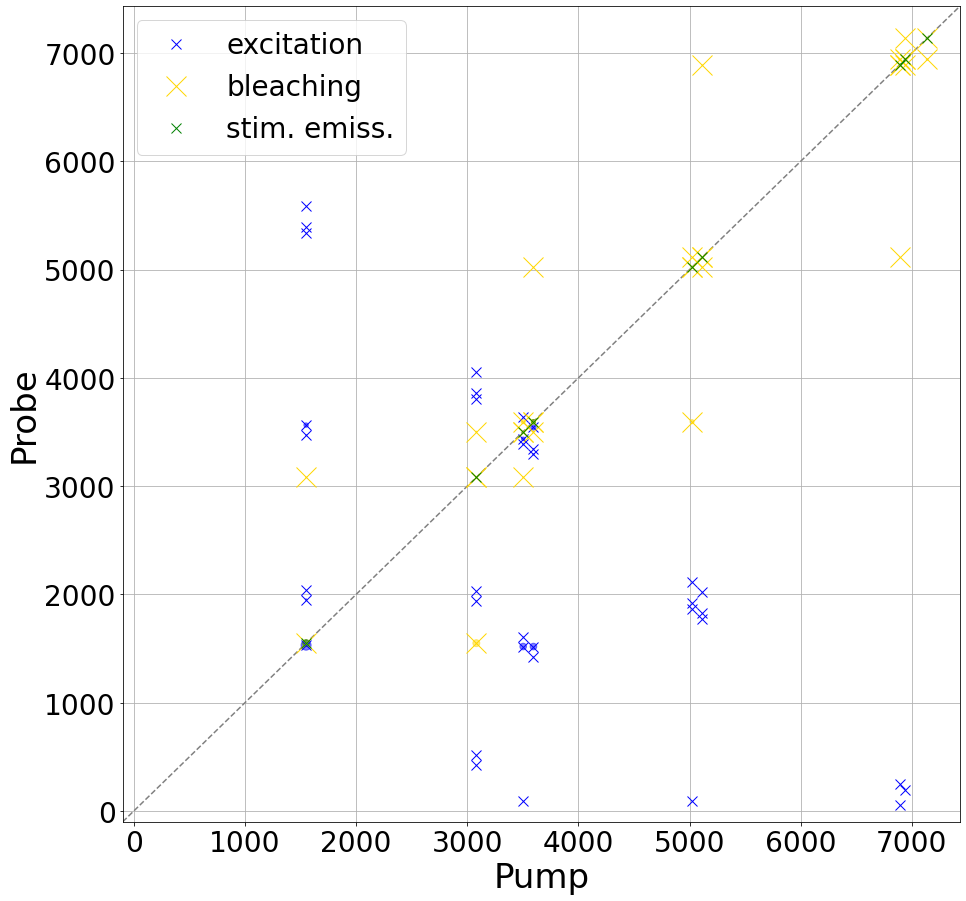

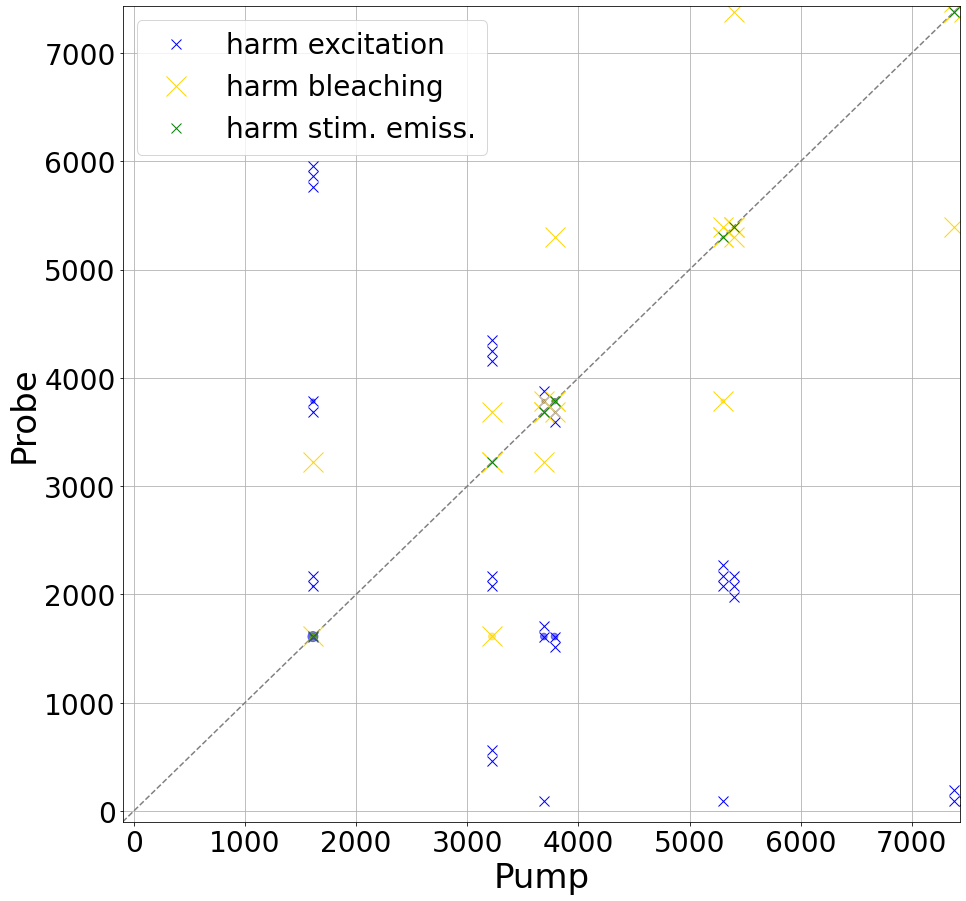

In [7]:
plt.figure(figsize=(15,15))
plt.plot([overall_min,overall_max], [overall_min,overall_max], ls="--", c=".5")
plt.plot(exc_x,exc_y, "bx", label='excitation', markersize=10)
plt.plot(ble_x,ble_y, "x", color='gold', label='bleaching', markersize=20)
plt.plot(emi_x,emi_y, "gx", label='stim. emiss.', markersize=10)
plt.scatter(exc_x,exc_y,s=exc_i, color='b', alpha=0.5)
plt.scatter(ble_x,ble_y,s=ble_i, color='gold', alpha=0.5)
plt.scatter(emi_x,emi_y,s=emi_i, color='g', alpha=0.5)
plt.xlim(overall_min,overall_max)
plt.ylim(overall_min,overall_max)
plt.grid(True)
plt.ylabel('Probe',fontsize=34)
plt.xlabel('Pump',fontsize=34)
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.legend(fontsize=28,loc='upper left')
#plt.show()
#plt.savefig('Bilder/%s_overview_anharm.png' %(mol),bbox_inches='tight')

overall_minh, overall_maxh = set_limits([exc_xh, ble_xh, emi_xh],[exc_yh, ble_yh, emi_yh])
#mprint(overall_min, overall_max)

plt.figure(figsize=(15,15))
plt.plot([overall_min,overall_max], [overall_min,overall_max], ls="--", c=".5")
plt.plot(exc_xh,exc_yh, "bx", label='harm excitation', markersize=10)
plt.plot(ble_xh,ble_yh, "x", color='gold', label='harm bleaching', markersize=20)
plt.plot(emi_xh,emi_yh, "gx", label='harm stim. emiss.', markersize=10)
plt.scatter(exc_xh,exc_yh,s=exc_i, color='b', alpha=0.5)
plt.scatter(ble_xh,ble_yh,s=ble_i, color='gold', alpha=0.5)
plt.scatter(emi_xh,emi_yh,s=emi_i, color='g', alpha=0.5)
plt.xlim(overall_min,overall_max)
plt.ylim(overall_min,overall_max)
plt.grid(True)
plt.ylabel('Probe',fontsize=34)
plt.xlabel('Pump',fontsize=34)
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.legend(fontsize=28,loc='upper left')
#plt.show()
#plt.savefig('Bilder/%s_overview_harm.png' %(mol),bbox_inches='tight')

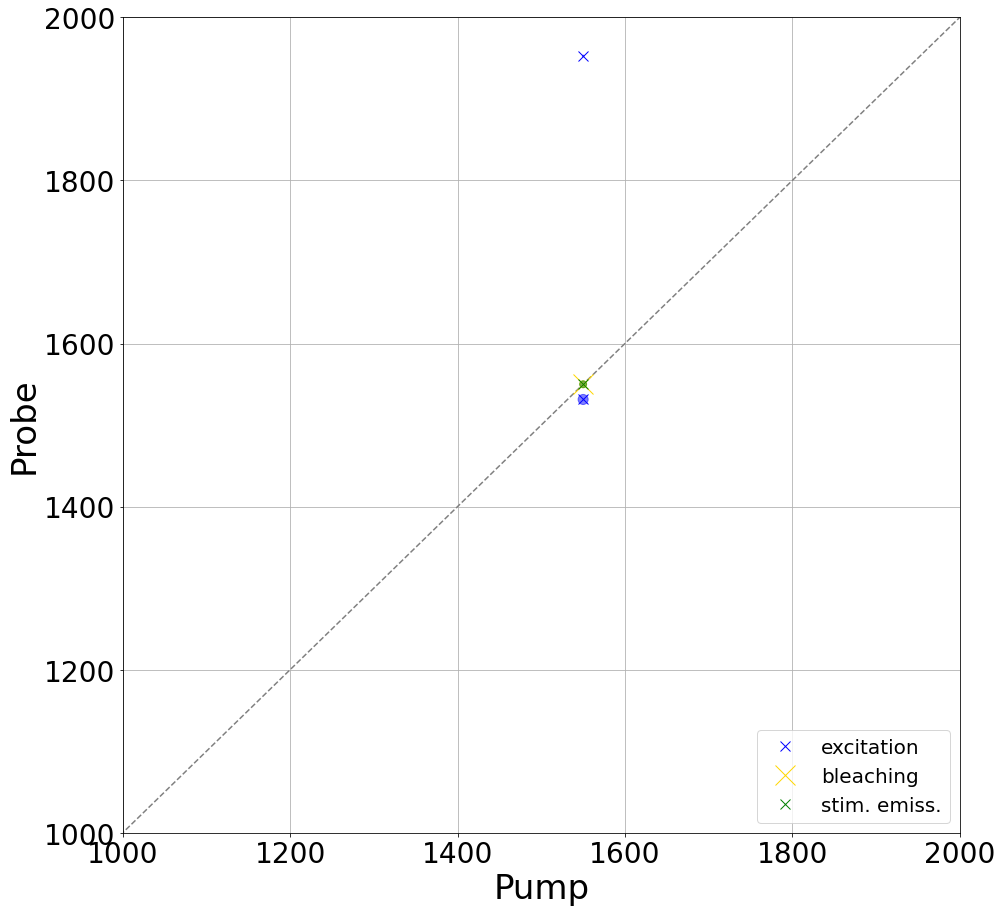

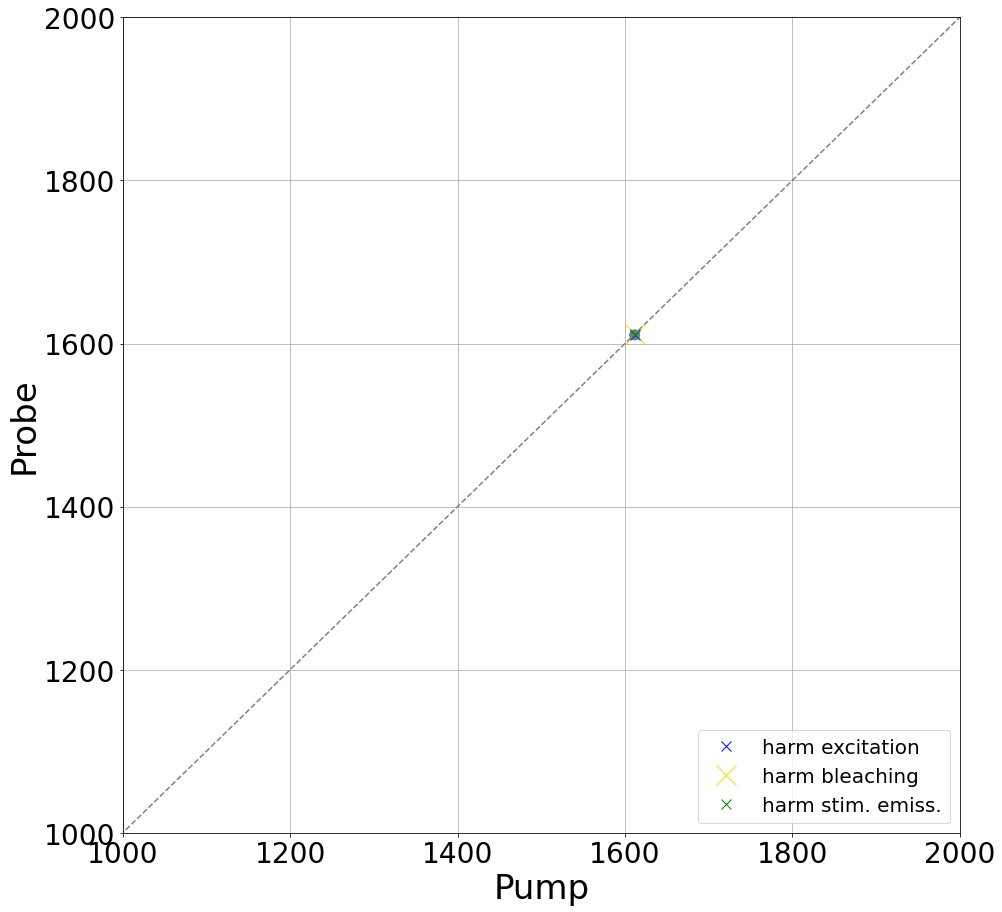

In [8]:
newmin = 1000
newmax = 2000

plt.figure(figsize=(15,15))
plt.plot([overall_min,overall_max], [overall_min,overall_max], ls="--", c=".5")
plt.plot(exc_x,exc_y, "bx", label='excitation', markersize=10)
plt.plot(ble_x,ble_y, "x", color='gold', label='bleaching', markersize=20)
plt.plot(emi_x,emi_y, "gx", label='stim. emiss.', markersize=10)
plt.scatter(exc_x,exc_y,s=exc_i, color='b', alpha=0.5)
plt.scatter(ble_x,ble_y,s=ble_i, color='gold', alpha=0.5)
plt.scatter(emi_x,emi_y,s=emi_i, color='g', alpha=0.5)
#plt.xlim(overall_min,overall_max)
#plt.ylim(overall_min,overall_max)
plt.xlim(newmin,newmax)
plt.ylim(newmin,newmax)
plt.grid(True)
plt.ylabel('Probe',fontsize=34)
plt.xlabel('Pump',fontsize=34)
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.legend(fontsize=20,loc='lower right')
#plt.savefig('Bilder/%s_CO_anharm.png' %(mol),bbox_inches='tight')

plt.figure(figsize=(15,15))
plt.plot([overall_min,overall_max], [overall_min,overall_max], ls="--", c=".5")
plt.plot(exc_xh,exc_yh, "bx", label='harm excitation', markersize=10)
plt.plot(ble_xh,ble_yh, "x", color='gold', label='harm bleaching', markersize=20)
plt.plot(emi_xh,emi_yh, "gx", label='harm stim. emiss.', markersize=10)
plt.scatter(exc_xh,exc_yh,s=exc_i, color='b', alpha=0.5)
plt.scatter(ble_xh,ble_yh,s=ble_i, color='gold', alpha=0.5)
plt.scatter(emi_xh,emi_yh,s=emi_i, color='g', alpha=0.5)
#plt.xlim(overall_min,overall_max)
#plt.ylim(overall_min,overall_max)
plt.xlim(newmin,newmax)
plt.ylim(newmin,newmax)
plt.grid(True)
plt.ylabel('Probe',fontsize=34)
plt.xlabel('Pump',fontsize=34)
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.legend(fontsize=20,loc='lower right')
#plt.savefig('Bilder/%s_CO_harm.png' %(mol),bbox_inches='tight')

In [9]:
def lorentz(gamma,x,x0,y,y0):
    #gamma = 5
    N = (gamma*1)/(2*np.pi)
    z = N * 1/( ((x-x0)**2 + (y-y0)**2 + (10*1)**2) )
    return z

def sum_lorentz(dim,x_val,y_val,intensity,xx,yy):
    z_val = np.zeros((dim,dim))
    for i in range(len(x_val)):
        z_val += lorentz(intensity[i],xx,x_val[i],yy,y_val[i])
    return z_val

In [10]:
dim = 500

lorentzmin = 1000
lorentzmax = 2000

x = np.linspace(lorentzmin, lorentzmax, dim)
y = np.linspace(lorentzmin, lorentzmax, dim)
xx, yy = np.meshgrid(x, y)

exc_z = sum_lorentz(dim,exc_x,exc_y,exc_i,xx,yy)
ble_z = sum_lorentz(dim,ble_x,ble_y,ble_i,xx,yy)
emi_z = sum_lorentz(dim,emi_x,emi_y,emi_i,xx,yy)

z = np.zeros((dim,dim))
z += exc_z - ble_z - emi_z

exc_zh = sum_lorentz(dim,exc_xh,exc_yh,exc_ih,xx,yy)
ble_zh = sum_lorentz(dim,ble_xh,ble_yh,ble_ih,xx,yy)
emi_zh = sum_lorentz(dim,emi_xh,emi_yh,emi_ih,xx,yy)

zh = np.zeros((dim,dim))
zh += exc_zh - ble_zh - emi_zh

In [11]:
def find_minmax(z):
    print(np.asarray(z).min(),np.asarray(z).max())
    if abs(np.asarray(z).max()) > abs(np.asarray(z).min()):
        z_val = abs(np.asarray(z).max())
        print('chose max: ', z_val)
    if abs(np.asarray(z).max()) < abs(np.asarray(z).min()):
        z_val = abs(np.asarray(z).min())
        print('chose min ', z_val)
    return z_val


z_val = find_minmax(z)
z_valh = find_minmax(zh)

-0.11851233892942552 0.12617693767931296
chose max:  0.12617693767931296
-0.009883111447712603 0.00937135373057206
chose min  0.009883111447712603


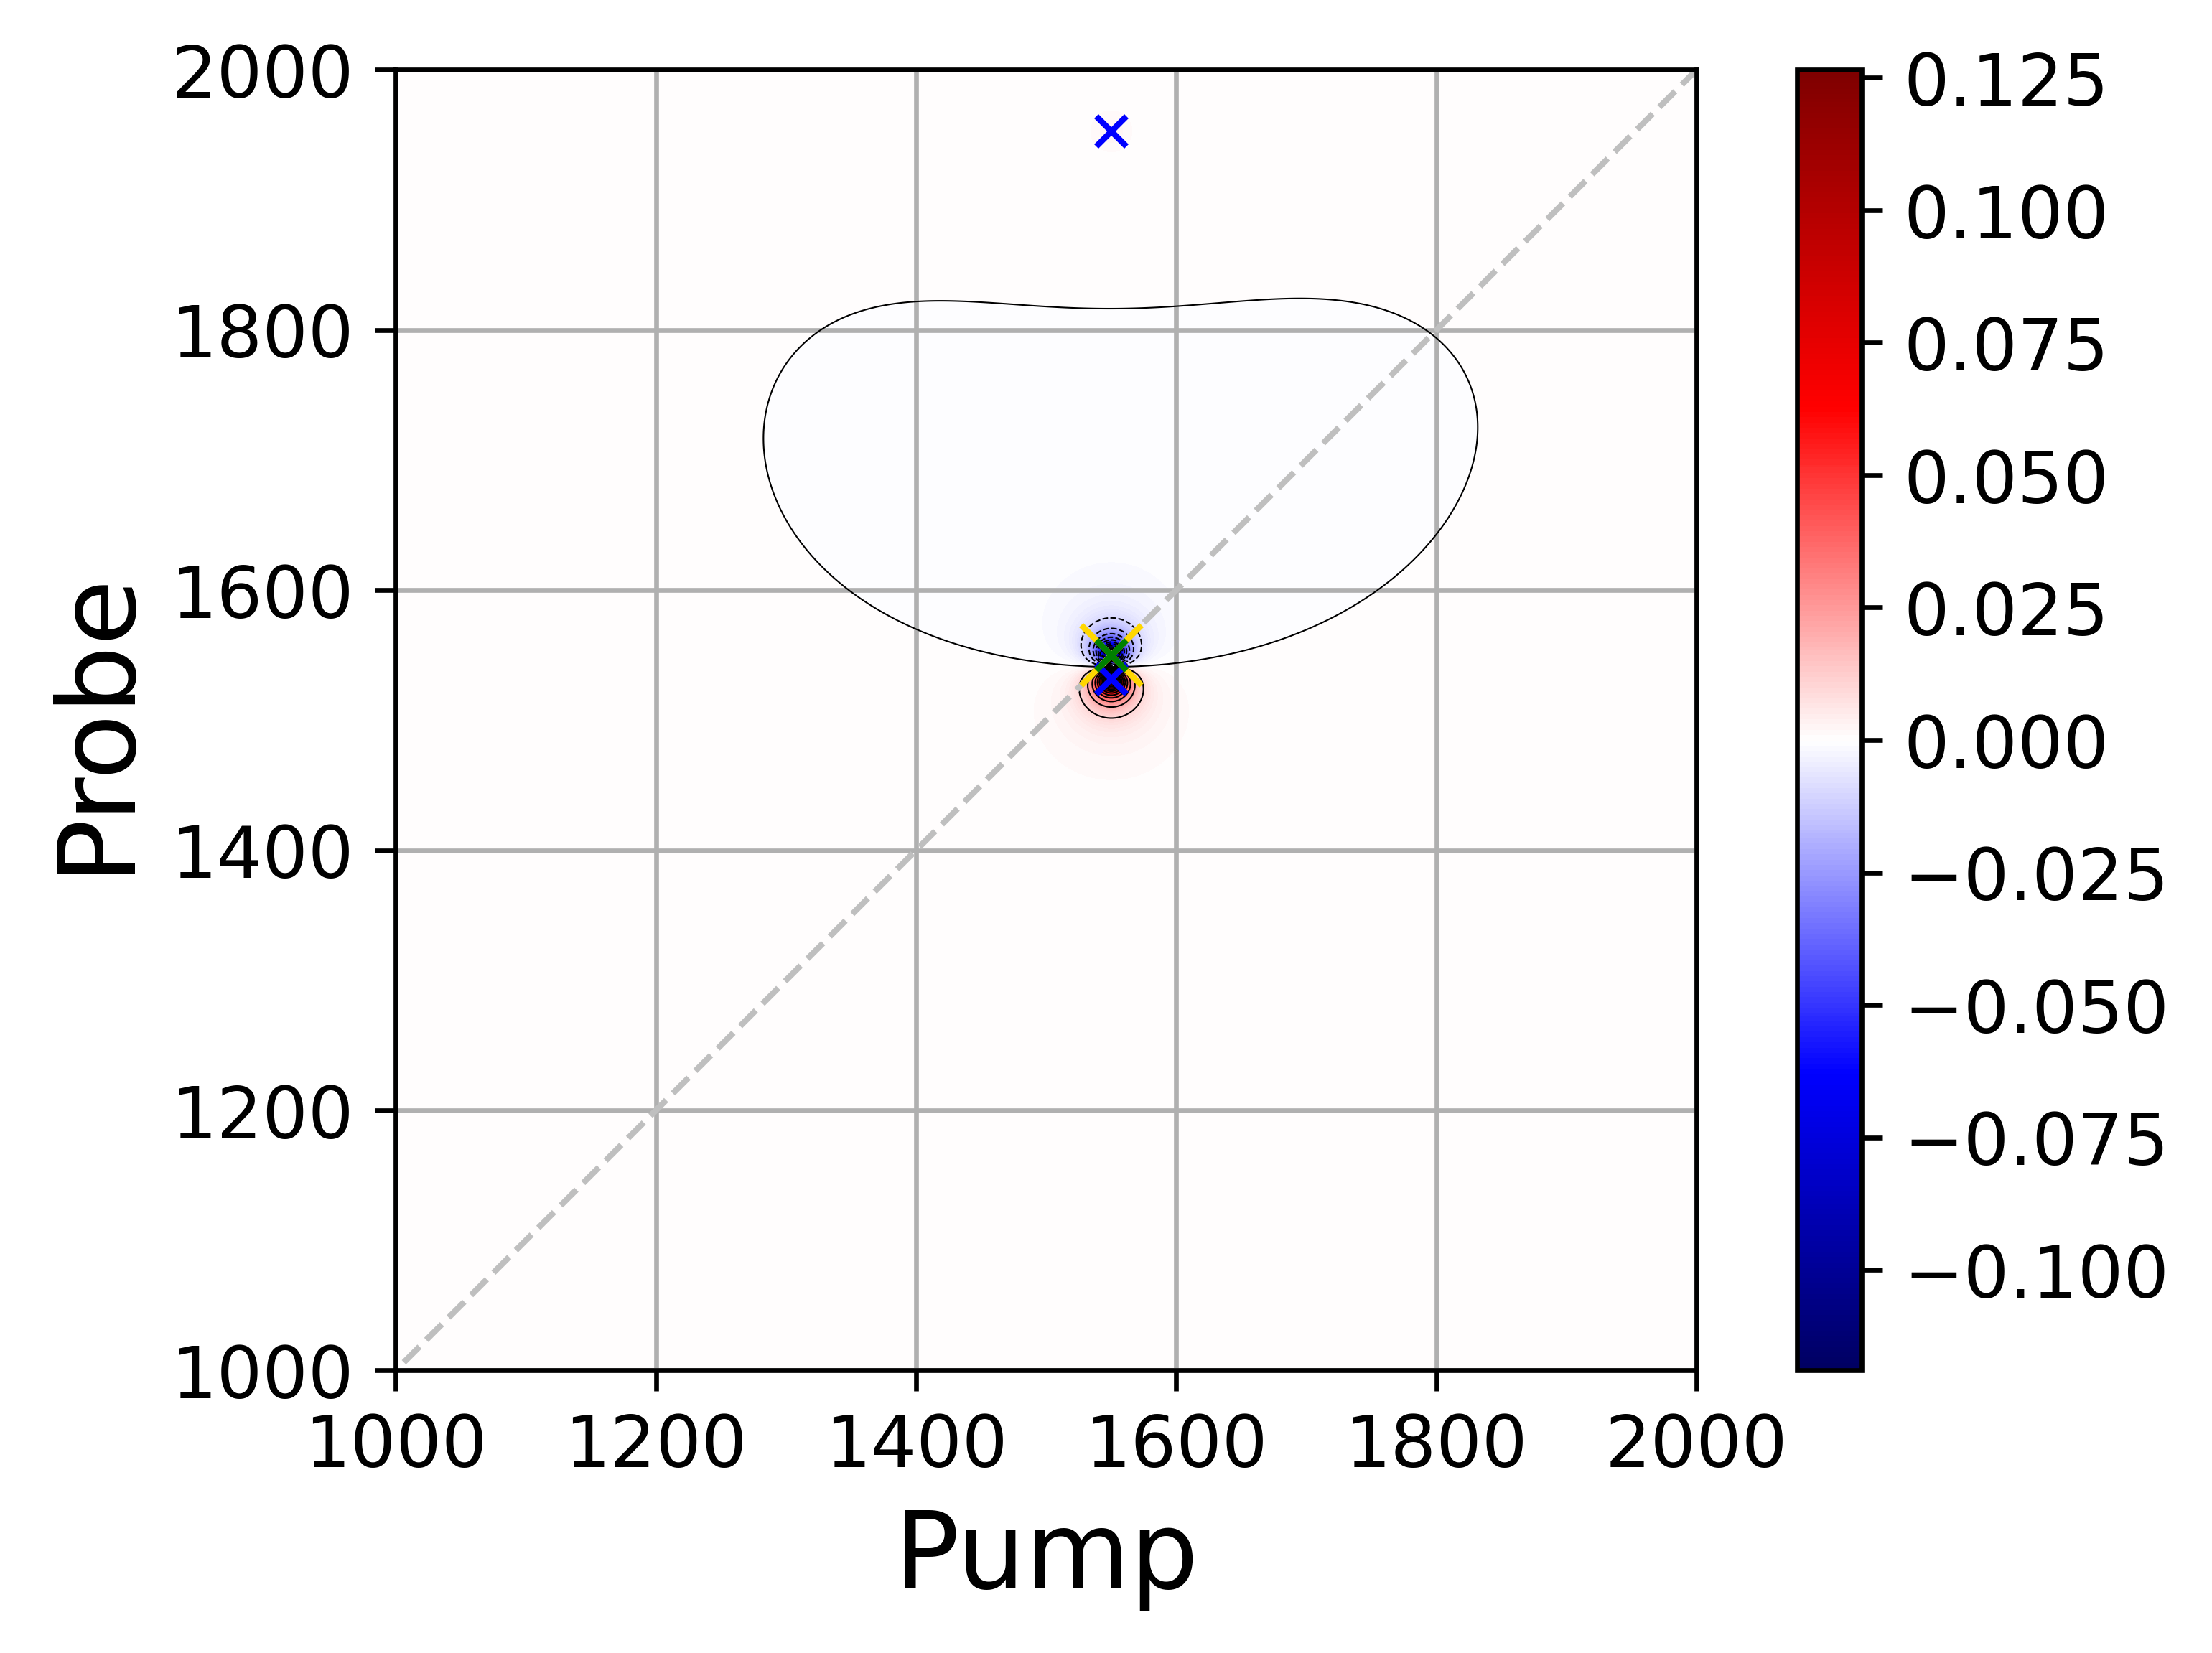

In [15]:
fig, ax = plt.subplots(dpi=600)
plt.plot([overall_min,overall_max], [overall_min,overall_max], ls="--", c="0.75", linewidth=1)

plt.grid(True)
ax.set_aspect(1./ax.get_data_ratio())

fig = plt.contourf(x,y,z, 500, alpha=1, cmap=plt.cm.seismic, vmax=z_val, vmin=-z_val)
CS = plt.contour(x,y,z,25,colors='k',linewidths=.25)
#ax.clabel(CS, inline=1, fontsize=5)

cbar = plt.colorbar(fig)
cbar.ax.tick_params(labelsize=12)
ax.tick_params(labelsize=12)
plt.xlabel('Pump', fontsize=18)
plt.ylabel('Probe', fontsize=18)
plt.xlim(lorentzmin,lorentzmax)
plt.ylim(lorentzmin,lorentzmax)

plt.plot(ble_x,ble_y, "x", color='gold', label='bleaching', markersize=10)
plt.plot(exc_x,exc_y, "bx", label='excitation', markersize=5)
plt.plot(emi_x,emi_y, "gx", label='stim. emiss.', markersize=5)
#plt.scatter(exc_x,exc_y,s=exc_i, color='b', alpha=0.5)
#plt.scatter(ble_x,ble_y,s=ble_i, color='gold', alpha=0.5)
#plt.scatter(emi_x,emi_y,s=emi_i, color='g', alpha=0.5)

#plt.show()

#plt.savefig('2DIRSpektrum_Wasser_anharm.png' ,bbox_inches='tight')

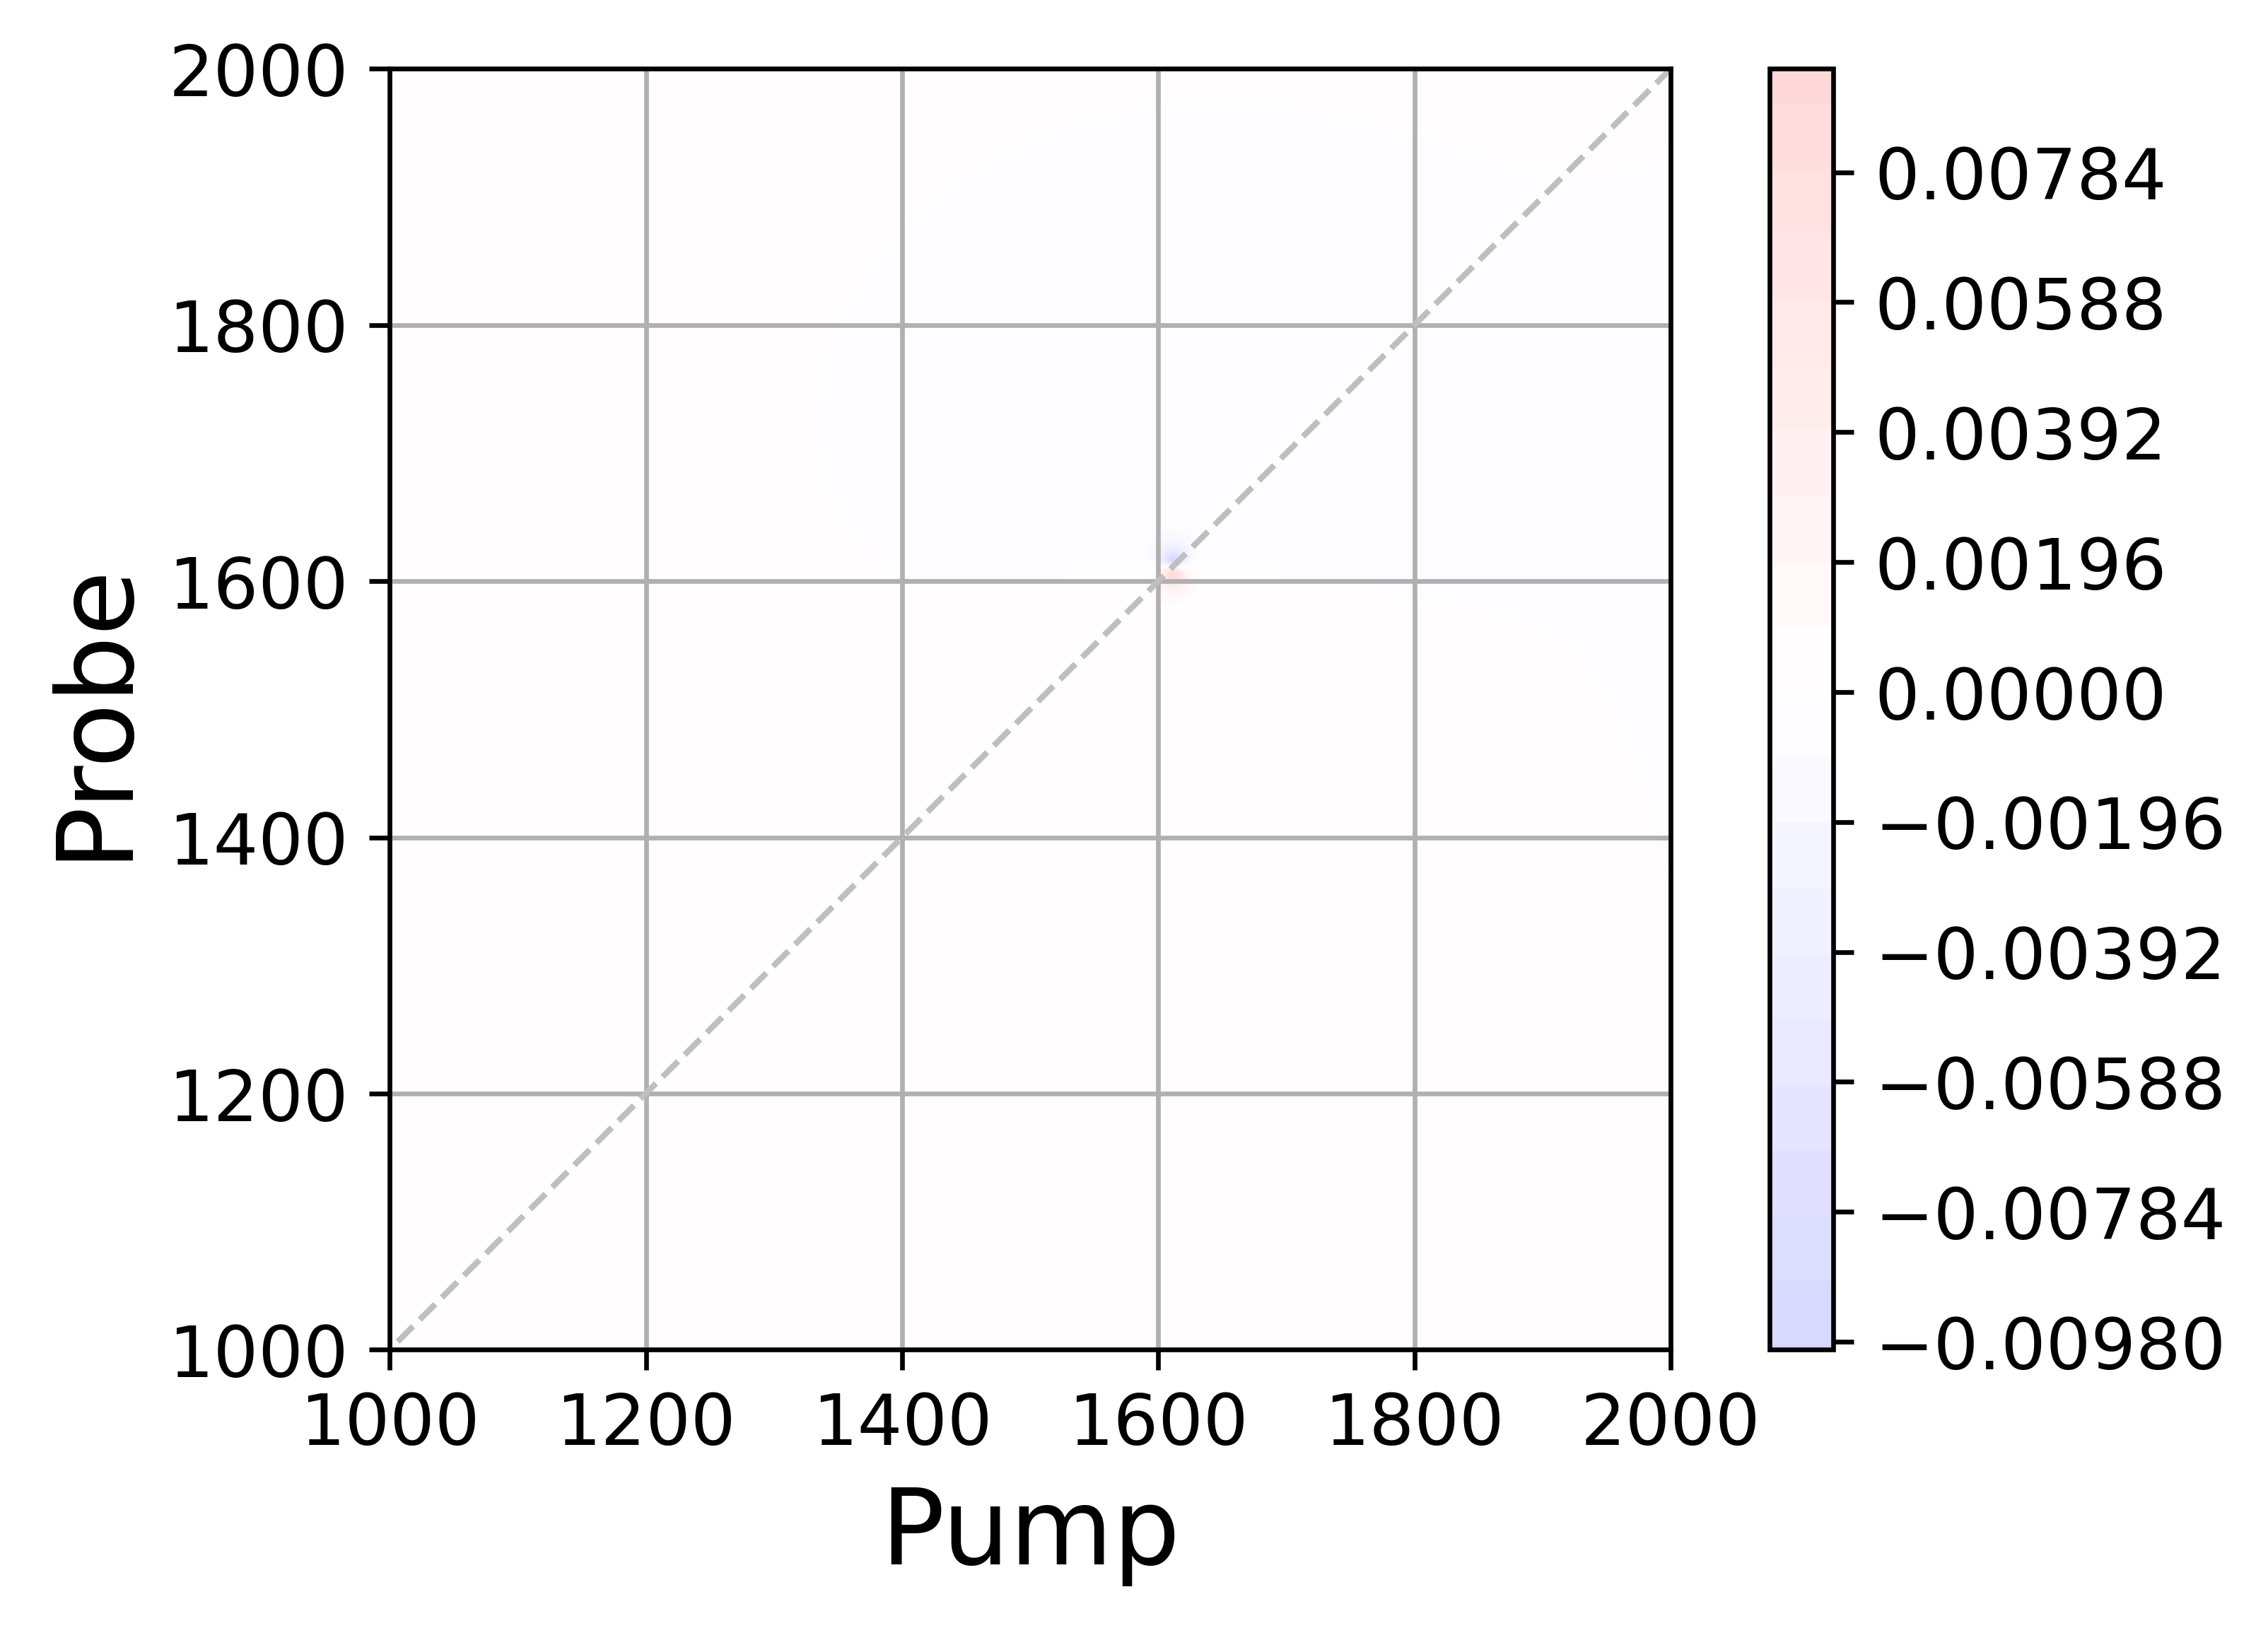

In [16]:
fig, ax = plt.subplots(dpi=600)
plt.plot([overall_min,overall_max], [overall_min,overall_max], ls="--", c="0.75", linewidth=1)

fig = plt.contourf(x,y,zh, 500, alpha=1, cmap=plt.cm.seismic, vmax=z_val, vmin=-z_val)
#CS = plt.contour(x,y,zh,25,colors='k',linewidths=.25)
#ax.clabel(CS, inline=1, fontsize=5)

plt.grid(True)
ax.set_aspect(1./ax.get_data_ratio())
cbar = plt.colorbar(fig)
cbar.ax.tick_params(labelsize=12)
ax.tick_params(labelsize=12)
plt.xlabel('Pump', fontsize=18)
plt.ylabel('Probe', fontsize=18)
plt.xlim(lorentzmin,lorentzmax)
plt.ylim(lorentzmin,lorentzmax)

#plt.plot(ble_xh,ble_yh, "x", color='gold', label='harm bleaching', markersize=10)
#plt.plot(exc_xh,exc_yh, "bx", label='harm excitation', markersize=5)
#plt.plot(emi_xh,emi_yh, "gx", label='harm stim. emiss.', markersize=5)

#plt.show()

#plt.savefig('2DIRSpektrum_Wasser_harm.png' ,bbox_inches='tight')